In [113]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
# import geopandas as gpd
import numpy as np
from time import time
from geopy.distance import geodesic
%matplotlib widget
from scipy.spatial import Delaunay
import random

In [92]:
dados = pd.read_csv("ocorrencias.csv")
data = dados[dados.columns[[0,1,5,13,-2]]]
data.dropna(inplace=True)


In [93]:
fatores = data.drop(["ocorrências"],axis=1)
target = data[["ocorrências"]].replace({2:1})

In [94]:
target.value_counts()

ocorrências
0              962
1              298
Name: count, dtype: int64

#### Ajustes

In [95]:
fatores.columns.to_list()

['precipitação', 'pressão', 'temperatura BS', 'umidade relativa ']

In [6]:
## biblioteca de modelos
from itertools import product
from logging import raiseExceptions
from sklearn.metrics import roc_auc_score, roc_curve,  accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
from sklearn.feature_selection import RFECV
from sklearn.pipeline import Pipeline
# from scipy.stats import f_oneway, kruskal, chi2_contingency
# import scikit_posthocs as sp
# from tqdm import tqdm


In [96]:
model = LogisticRegression(class_weight='balanced',max_iter=100000)
pipe = Pipeline([('escala',StandardScaler()),('modelo',model)])


In [71]:
X_train,X_test,y_train,y_test = train_test_split(fatores,target,test_size=0.3,stratify=target)
pipe.fit(X_train,y_train)
y_pred = pipe.predict_proba(X_test)[:,1]

In [97]:
scores = []
coefs = []
for i in range(100):
    X_train,X_test,y_train,y_test = train_test_split(fatores,target,test_size=0.3,stratify=target)
    pipe.fit(X_train,y_train)
    y_pred = pipe.predict_proba(X_test)[:,1]
    scores.append(roc_auc_score(y_test,y_pred))
    coefs.append(pipe.named_steps["modelo"].coef_)


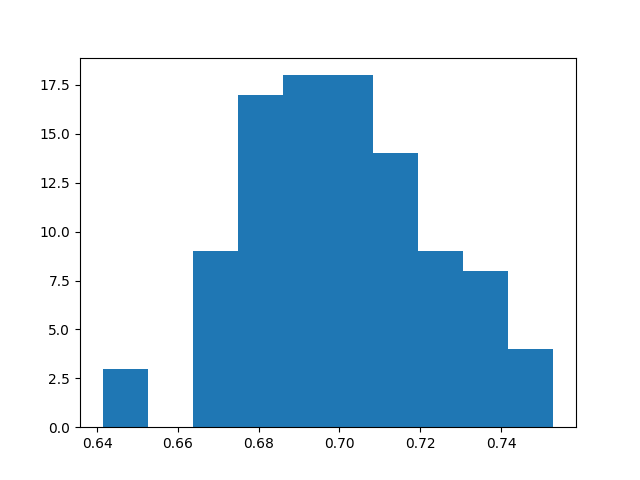

In [98]:
fig,ax = plt.subplots()
ax.hist(scores)
plt.show()

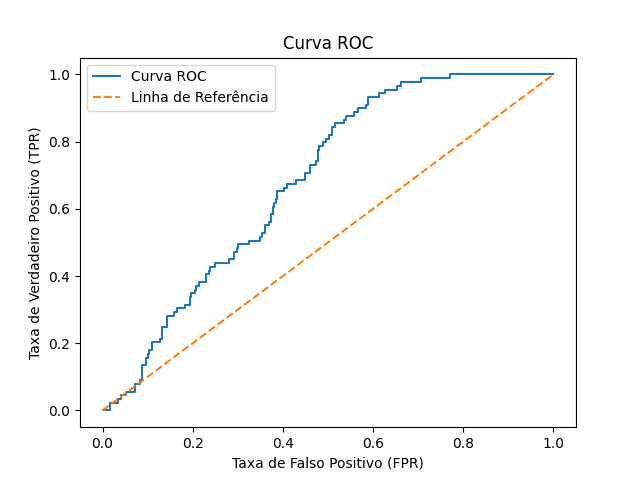

In [106]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
fig,ax = plt.subplots()

# Plotar a curva ROC
ax.plot(fpr, tpr, label='Curva ROC')
ax.plot([0, 1], [0, 1], linestyle='--', label='Linha de Referência')
plt.xlabel('Taxa de Falso Positivo (FPR)')
plt.ylabel('Taxa de Verdadeiro Positivo (TPR)')
plt.title('Curva ROC')
plt.legend()
plt.show()

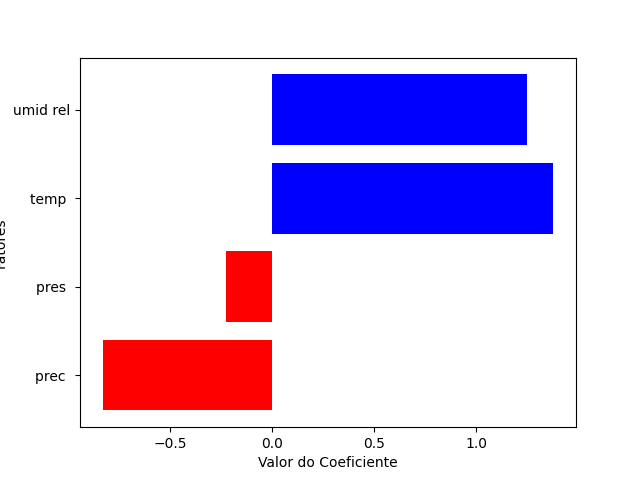

In [107]:
matriz = np.concatenate(coefs, axis=0)
# media_colunas = 
coeficientes = np.mean(matriz, axis=0)
cores = ['blue' if coef > 0 else 'red' for coef in coeficientes]

# Criando o gráfico de barras
fig,ax = plt.subplots()
ax.barh(range(len(coeficientes)), coeficientes, color=cores)

# Adicionando título e rótulos
# plt.title('Coeficientes')
plt.ylabel('Fatores')
plt.xlabel('Valor do Coeficiente')

labels_x = [f'{x.split(" ")[0][:4]} {x.split(" ")[1][:3]}' if len(x.split(" ")) >2 else f'{x[:4]} ' for x in fatores.columns.to_list()]

ax.set_yticks(range(len(labels_x)))
ax.set_yticklabels(labels_x)

# Exibindo o gráfico
plt.show()

In [111]:
confusion_matrix(y_test,y_pred>=0.75)

array([[274,  15],
       [ 85,   4]])

In [120]:
medias_colunas_df1 = []
medias_colunas_df2 = []

for _ in range(1000):
    indices_amostra = X_train.index.tolist()
    amostra_indices = pd.Series(indices_amostra).sample(n=len(indices_amostra),replace=True)
    media_amostra_df1 = X_train.loc[amostra_indices].mean(axis=0)
    media_amostra_df2 = y_train.loc[amostra_indices].mean(axis=0)
    medias_colunas_df1.append(media_amostra_df1)
    medias_colunas_df2.append(media_amostra_df2)

medias_df1 = pd.DataFrame(medias_colunas_df1)
medias_df2 = pd.DataFrame(medias_colunas_df2)

In [122]:
model = LogisticRegression(class_weight='balanced',max_iter=100000)
pipe = Pipeline([('escala',StandardScaler()),('modelo',model)])
y_pred = pipe.predict_proba(X_test)[:,1]

NotFittedError: This StandardScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
fig,ax = plt.subplots()

# Plotar a curva ROC
ax.plot(fpr, tpr, label='Curva ROC')
ax.plot([0, 1], [0, 1], linestyle='--', label='Linha de Referência')
plt.xlabel('Taxa de Falso Positivo (FPR)')
plt.ylabel('Taxa de Verdadeiro Positivo (TPR)')
plt.title('Curva ROC')
plt.legend()
plt.show()

In [101]:
from sklearn.inspection import permutation_importance
model_fi = permutation_importance(model, X_test, y_test)
model_fi

{'importances_mean': array([0., 0., 0., 0.]),
 'importances_std': array([0., 0., 0., 0.]),
 'importances': array([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])}